## Deep Learning Model

In [0]:
simplified_dataset_url = "https://raw.githubusercontent.com/vishal-pandey/ml-and-ds/master/datasets/delhi_weather_simplified.csv"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

In [0]:
df1 = pd.read_csv(simplified_dataset_url)
df1['datetime_utc'] = pd.to_datetime(df1['datetime_utc'])
df1.set_index('datetime_utc', inplace= True)

### Data gereration


In [0]:
myTemperature = df1.iloc[:, -1].values
myData = df1.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
myData1 = df1.iloc[:, [7]]

In [0]:
N = 25
O = 5
P = 25

In [0]:
X_multi = []
X_uni = []
y = []
for i in range(len(myData) - (N + O + P)):
  # temp = []
  # temp.append(pm25[i : i+N] + [0 for _ in range(O)] + pm25[i+N+O : i+N+O+P])
  temp1 = myData[i : i+N]
  temp2 = [[0 for __ in range(7)] for _ in range(O)]
  temp3 = myData[i+N+O : i+N+O+P]
  X_multi.append(np.append(np.append(temp1, temp2), temp3))

  temp1 = myData1[i : i+N]
  temp2 = [[0 for __ in range(1)] for _ in range(O)]
  temp3 = myData1[i+N+O : i+N+O+P]
  X_uni.append(np.append(np.append(temp1, temp2), temp3))
  
  y.append(myTemperature[i+N : i+N+O])


In [0]:
X_uni = np.array(X_uni)
X_multi = np.array(X_multi)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni, y, shuffle=False)
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, shuffle=False)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler_X_train_uni = StandardScaler()
scaler_X_train_uni.fit(X_train_uni)
X_train_uni = scaler_X_train_uni.transform(X_train_uni)

scaler_X_train_multi = StandardScaler()
scaler_X_train_multi.fit(X_train_multi)
X_train_multi = scaler_X_train_multi.transform(X_train_multi)

scaler_X_test_uni = StandardScaler()
scaler_X_test_uni.fit(X_test_uni)
X_test_uni = scaler_X_test_uni.transform(X_test_uni)

scaler_X_test_multi = StandardScaler()
scaler_X_test_multi.fit(X_test_multi)
X_test_multi = scaler_X_test_multi.transform(X_test_multi)

scaler_y_train = StandardScaler()
scaler_y_train.fit(y_train)
y_train = scaler_y_train.transform(y_train)

scaler_y_test = StandardScaler()
scaler_y_test.fit(y_test)
y_test = scaler_y_test.transform(y_test)

In [0]:
X_train_uni = X_train_uni.reshape(X_train_uni.shape[0], 1, N+O+P)
X_test_uni = X_test_uni.reshape(X_test_uni.shape[0], 1, N+O+P)

X_train_multi = X_train_multi.reshape(X_train_multi.shape[0], 7, N+O+P)
X_test_multi = X_test_multi.reshape(X_test_multi.shape[0], 7, N+O+P)


### LSTM Model

In [0]:
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

#### Univariate LSTM Model

In [0]:
model = Sequential()
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [67]:
model.fit(X_train_uni, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 4s 740us/step - loss: 0.2201 - acc: 0.2141
Epoch 2/20
5460/5460 [==============================] - 1s 262us/step - loss: 0.1298 - acc: 0.2681
Epoch 3/20
5460/5460 [==============================] - 2s 293us/step - loss: 0.1230 - acc: 0.3158
Epoch 4/20
5460/5460 [==============================] - 2s 278us/step - loss: 0.1207 - acc: 0.3399
Epoch 5/20
5460/5460 [==============================] - 2s 279us/step - loss: 0.1187 - acc: 0.3418
Epoch 6/20
5460/5460 [==============================] - 2s 307us/step - loss: 0.1179 - acc: 0.3491
Epoch 7/20
5460/5460 [==============================] - 2s 293us/step - loss: 0.1174 - acc: 0.3551
Epoch 8/20
5460/5460 [==============================] - 2s 312us/step - loss: 0.1161 - acc: 0.3606
Epoch 9/20
5460/5460 [==============================] - 2s 285us/step - loss: 0.1159 - acc: 0.3531
Epoch 10/20
5460/5460 [==============================] - 2s 288us/step - loss: 0.1155 - acc: 0.3586
Epoch 11/

In [0]:
model.save("univariate_lstm.h5")

In [0]:
y_hat_train = model.predict(X_train_uni)
y_hat_test = model.predict(X_test_uni)

##### Prediction on training data

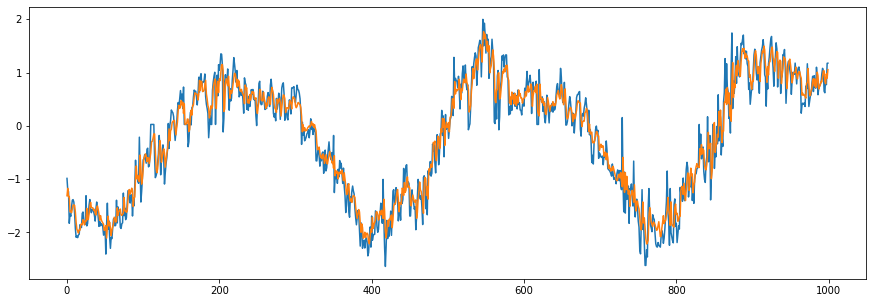

In [70]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

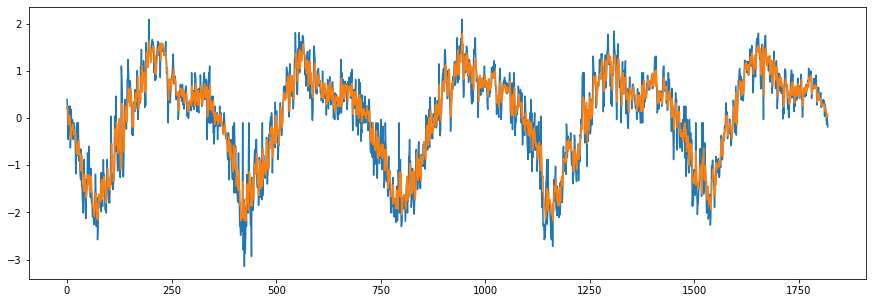

In [71]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:4000, 0])
plt.plot(y_hat_test[:4000, 0])
plt.show()

In [72]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.10760415520009961

In [73]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.1559581184878425

#### Multivariate LSTM Model

In [0]:
model = Sequential()
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [75]:
model.fit(X_train_multi, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 8s 1ms/step - loss: 0.2956 - acc: 0.2304
Epoch 2/20
5460/5460 [==============================] - 5s 870us/step - loss: 0.1741 - acc: 0.2419
Epoch 3/20
5460/5460 [==============================] - 4s 811us/step - loss: 0.1578 - acc: 0.2573
Epoch 4/20
5460/5460 [==============================] - 5s 912us/step - loss: 0.1480 - acc: 0.2559
Epoch 5/20
5460/5460 [==============================] - 5s 867us/step - loss: 0.1401 - acc: 0.2705
Epoch 6/20
5460/5460 [==============================] - 5s 856us/step - loss: 0.1332 - acc: 0.2727
Epoch 7/20
5460/5460 [==============================] - 4s 811us/step - loss: 0.1286 - acc: 0.2837
Epoch 8/20
5460/5460 [==============================] - 5s 854us/step - loss: 0.1226 - acc: 0.2837
Epoch 9/20
5460/5460 [==============================] - 5s 914us/step - loss: 0.1199 - acc: 0.2916
Epoch 10/20
5460/5460 [==============================] - 5s 869us/step - loss: 0.1143 - acc: 0.3020
Epoch 11/20

In [0]:
model.save("multivariate_lstm.h5")

In [0]:
y_hat_train = model.predict(X_train_multi)
y_hat_test = model.predict(X_test_multi)

##### Prediction on training data

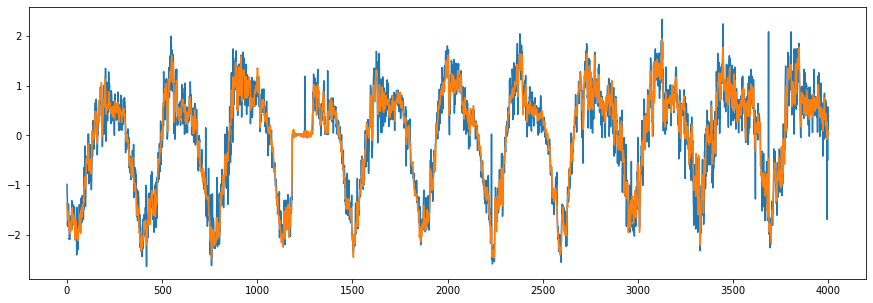

In [78]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:4000, 0])
plt.plot(y_hat_train[:4000, 0])
plt.show()

##### Prediction on testing data

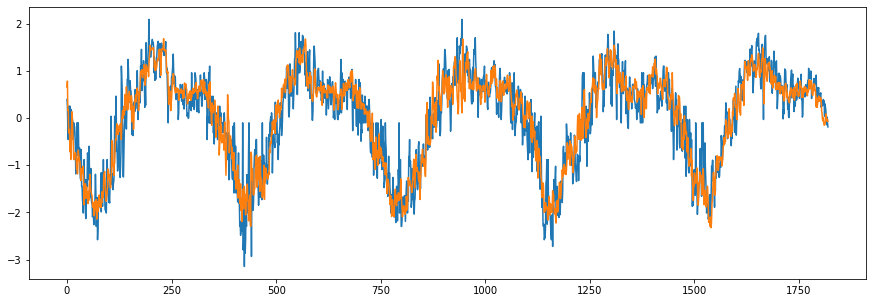

In [79]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:4000, 0])
plt.plot(y_hat_test[:4000, 0])
plt.show()

In [80]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.07282722588473664

In [81]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)


0.20641356177069325

#### Univariate LSTM Model (Bidirectional)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [83]:
model.fit(X_train_uni, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.2387 - acc: 0.2117
Epoch 2/20
5460/5460 [==============================] - 2s 350us/step - loss: 0.1314 - acc: 0.2811
Epoch 3/20
5460/5460 [==============================] - 2s 326us/step - loss: 0.1238 - acc: 0.3244
Epoch 4/20
5460/5460 [==============================] - 2s 366us/step - loss: 0.1207 - acc: 0.3311
Epoch 5/20
5460/5460 [==============================] - 2s 391us/step - loss: 0.1180 - acc: 0.3473
Epoch 6/20
5460/5460 [==============================] - 2s 368us/step - loss: 0.1168 - acc: 0.3553
Epoch 7/20
5460/5460 [==============================] - 2s 375us/step - loss: 0.1167 - acc: 0.3548
Epoch 8/20
5460/5460 [==============================] - 2s 346us/step - loss: 0.1159 - acc: 0.3571
Epoch 9/20
5460/5460 [==============================] - 2s 350us/step - loss: 0.1153 - acc: 0.3610
Epoch 10/20
5460/5460 [==============================] - 2s 346us/step - loss: 0.1145 - acc: 0.3636
Epoch 11/20

In [0]:
model.save("univariate_lstm_bidirectional.h5")

In [0]:
y_hat_train = model.predict(X_train_uni)
y_hat_test = model.predict(X_test_uni)

##### Prediction on training data

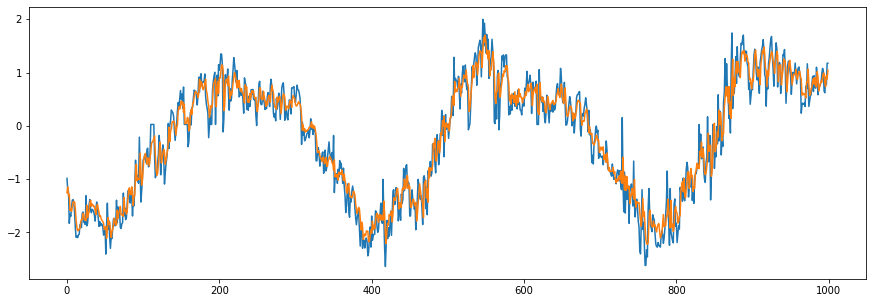

In [86]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

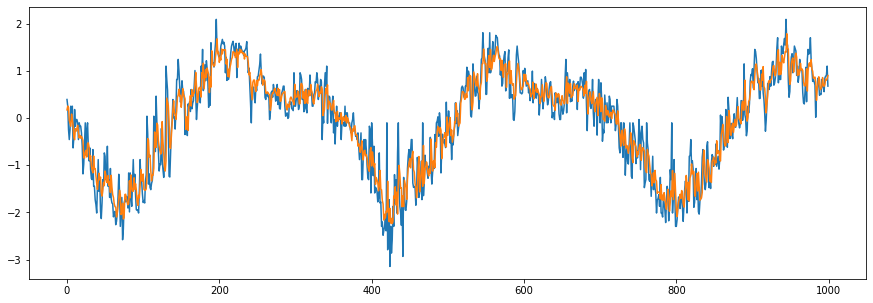

In [87]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:1000, 0])
plt.plot(y_hat_test[:1000, 0])
plt.show()

In [88]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.10766191996481363

In [89]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.15787004203038332

#### Multivariate LSTM Model (Bidirectional)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [91]:
model.fit(X_train_multi, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 11s 2ms/step - loss: 0.3035 - acc: 0.2136
Epoch 2/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1791 - acc: 0.2359
Epoch 3/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1602 - acc: 0.2379
Epoch 4/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1491 - acc: 0.2487
Epoch 5/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1428 - acc: 0.2650
Epoch 6/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1358 - acc: 0.2647
Epoch 7/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1299 - acc: 0.2859
Epoch 8/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1242 - acc: 0.2806
Epoch 9/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1203 - acc: 0.2813
Epoch 10/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1178 - acc: 0.2835
Epoch 11/20
5460/5460 [=====

In [0]:
model.save("multivariate_lstm_bidirectional.h5")

In [0]:
y_hat_train = model.predict(X_train_multi)
y_hat_test = model.predict(X_test_multi)

##### Prediction on training data

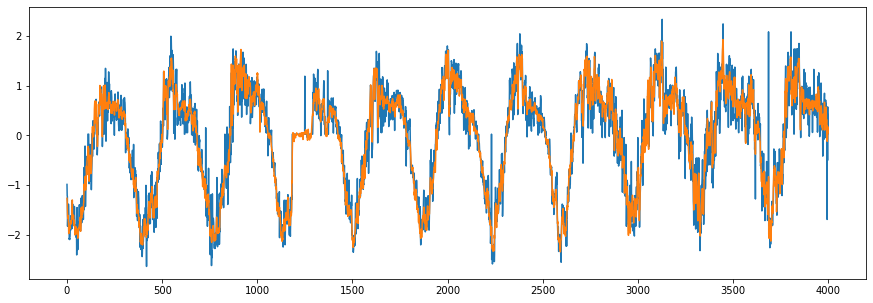

In [94]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:4000, 0])
plt.plot(y_hat_train[:4000, 0])
plt.show()

##### Prediction on testing data

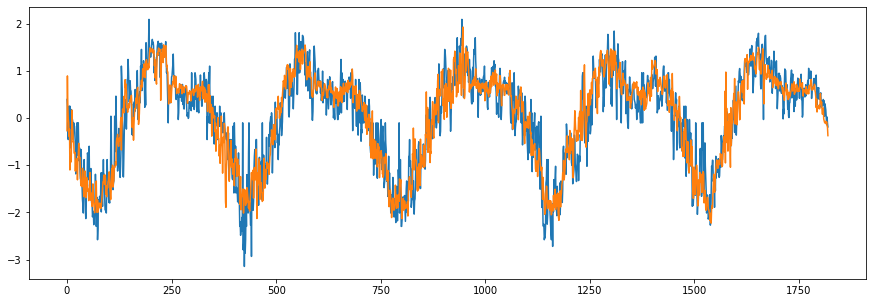

In [95]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:4000, 0])
plt.plot(y_hat_test[:4000, 0])
plt.show()

In [96]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.0808561193043287

In [97]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.21789783461566753

#### Univariate SSIM Model

In [98]:
!pip install keras-self-attention

In [0]:
from keras_self_attention import SeqSelfAttention

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [101]:
model.fit(X_train_uni, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 8s 1ms/step - loss: 0.2229 - acc: 0.2145
Epoch 2/20
5460/5460 [==============================] - 3s 491us/step - loss: 0.1307 - acc: 0.2813
Epoch 3/20
5460/5460 [==============================] - 3s 462us/step - loss: 0.1250 - acc: 0.3048
Epoch 4/20
5460/5460 [==============================] - 2s 453us/step - loss: 0.1207 - acc: 0.3372
Epoch 5/20
5460/5460 [==============================] - 3s 463us/step - loss: 0.1190 - acc: 0.3419
Epoch 6/20
5460/5460 [==============================] - 2s 428us/step - loss: 0.1183 - acc: 0.3548
Epoch 7/20
5460/5460 [==============================] - 2s 427us/step - loss: 0.1161 - acc: 0.3548
Epoch 8/20
5460/5460 [==============================] - 2s 430us/step - loss: 0.1160 - acc: 0.3648
Epoch 9/20
5460/5460 [==============================] - 3s 458us/step - loss: 0.1164 - acc: 0.3538
Epoch 10/20
5460/5460 [==============================] - 3s 460us/step - loss: 0.1145 - acc: 0.3692
Epoch 11/20

In [0]:
model.save("univariate_ssim.h5")

In [0]:
y_hat_train = model.predict(X_train_uni)
y_hat_test = model.predict(X_test_uni)

##### Prediction on training data

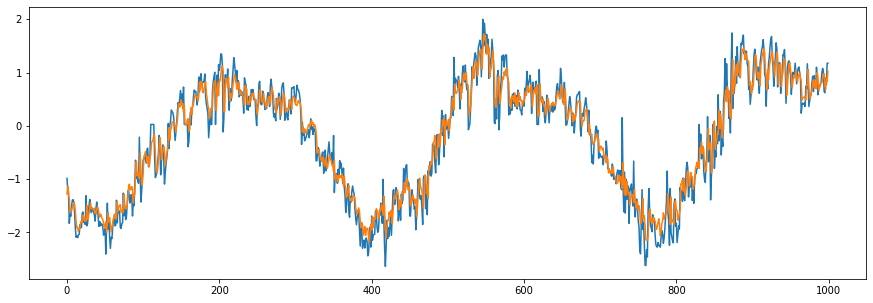

In [104]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

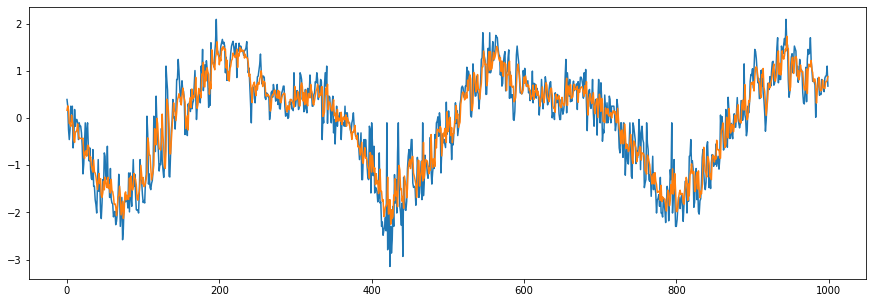

In [105]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:1000, 0])
plt.plot(y_hat_test[:1000, 0])
plt.show()

In [106]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.10654914661413913

In [107]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.15676659651279393

#### Multivariate SSIM Model

In [0]:
from keras_self_attention import SeqSelfAttention

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [110]:
model.fit(X_train_multi, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 12s 2ms/step - loss: 0.3129 - acc: 0.2154
Epoch 2/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1685 - acc: 0.2407
Epoch 3/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1525 - acc: 0.2564
Epoch 4/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1399 - acc: 0.2645
Epoch 5/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1326 - acc: 0.2850
Epoch 6/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1244 - acc: 0.2914
Epoch 7/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1187 - acc: 0.3026
Epoch 8/20
5460/5460 [==============================] - 8s 1ms/step - loss: 0.1140 - acc: 0.3183
Epoch 9/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1079 - acc: 0.3172
Epoch 10/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1034 - acc: 0.3183
Epoch 11/20
5460/5460 [=====

In [0]:
model.save("multivariate_ssim.h5")

In [0]:
y_hat_train = model.predict(X_train_multi)
y_hat_test = model.predict(X_test_multi)

##### Prediction on training data

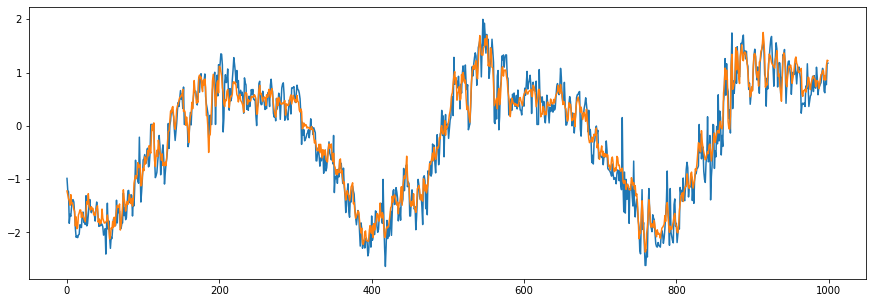

In [114]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

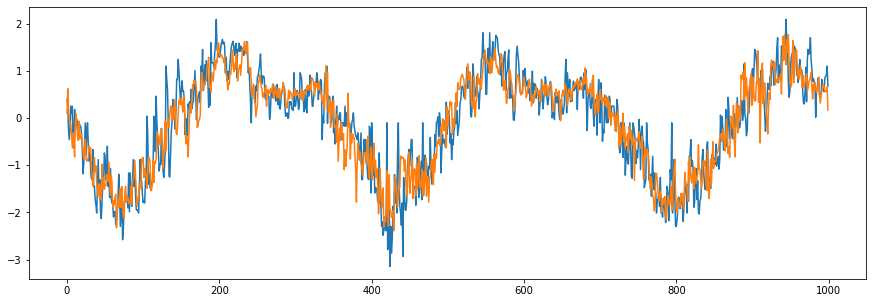

In [115]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:1000, 0])
plt.plot(y_hat_test[:1000, 0])
plt.show()

In [116]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.06178889120462368

In [117]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.22588392734627857